### Importing Libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from xgboost import XGBClassifier

In [54]:
import warnings
warnings.filterwarnings('ignore')

### Data Collection

In [55]:
#Extracting data
dataset=pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [56]:
#Our dataset dimesnions
dataset.shape

(2000, 9)

In [57]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

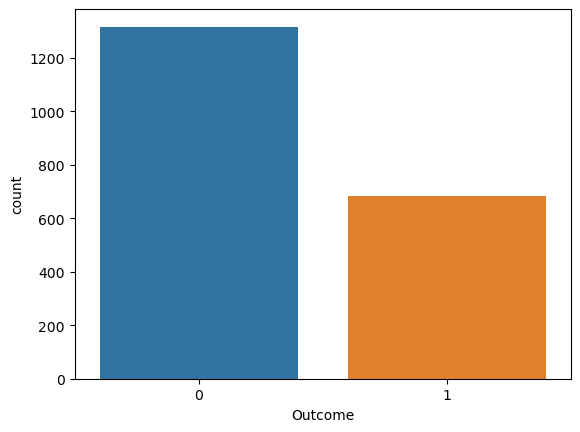

In [58]:
#Countng values of outcomes having 0 or 1, 0 means non diabetic and 1 means diabetic
sns.countplot(x='Outcome',data=dataset)

In [59]:
dataset['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

In [60]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.168693,110.586626,68.094985,20.052432,70.563830,30.567477,0.434676,31.081307
1,4.732456,141.568713,71.166667,22.633041,98.897661,35.320468,0.540681,36.956140


<Axes: >

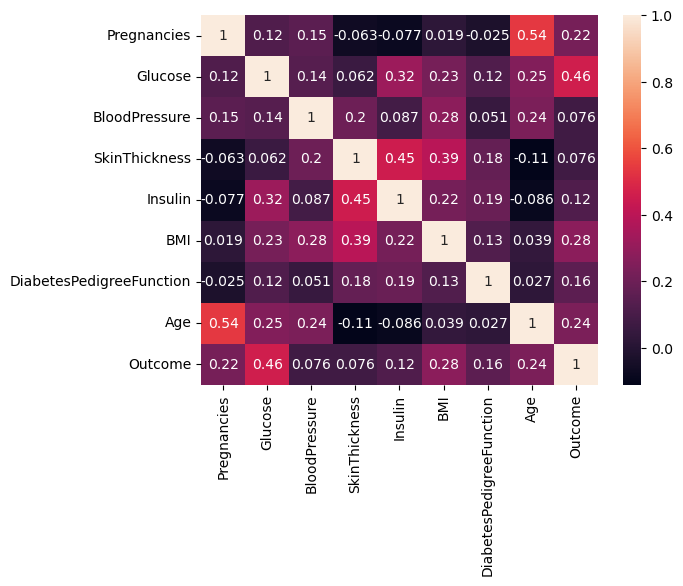

In [61]:
#Correlation matrix to show correlation between two variables, 0.x means x% similar
corr_mat=dataset.corr()
sns.heatmap(corr_mat, annot=True)



In [62]:
#Ex: correlatiom between Glucose and Outcome is 47% that means output depends majorly on Glucose

 ### Data Cleaning

In [63]:
#Check if any null or empty data is present in dataset
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [64]:
#Feature matrix - Taking all our independent columns into single array and dependent values into another array
x=dataset.iloc[:,:-1].values  #Independent matrix
y=dataset.iloc[:,-1].values

In [65]:
x.shape

(2000, 8)

In [66]:
x[0] #refering to column 1 in dataset i.e pregnancies

array([2.00e+00, 1.38e+02, 6.20e+01, 3.50e+01, 0.00e+00, 3.36e+01,
       1.27e-01, 4.70e+01])

In [67]:
y

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

### Exploratory Data Analysis

#### Checking which columns are useful or not

Text(0.5, 1.0, 'Pregnancies for Diabetic')

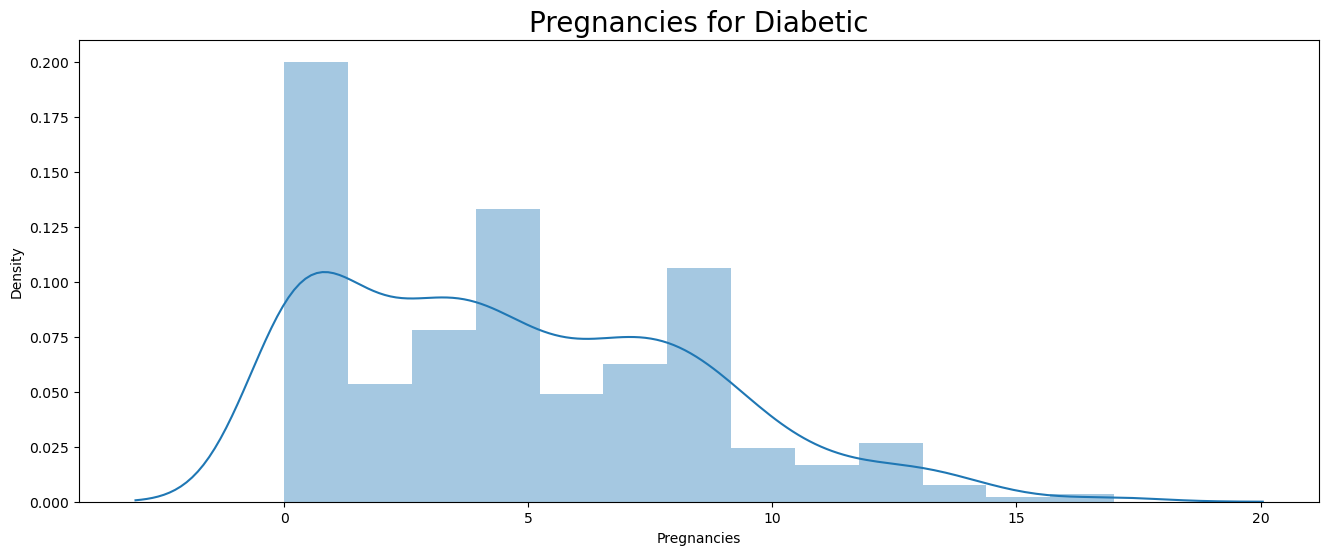

In [68]:
# Pregnancies for diabetic
fig = plt.figure(figsize=(16, 6))

sns.distplot(dataset["Pregnancies"][dataset["Outcome"] == 1])
plt.xticks()
plt.title("Pregnancies for Diabetic", fontsize=20)

Text(0.5, 1.0, 'Glucose')

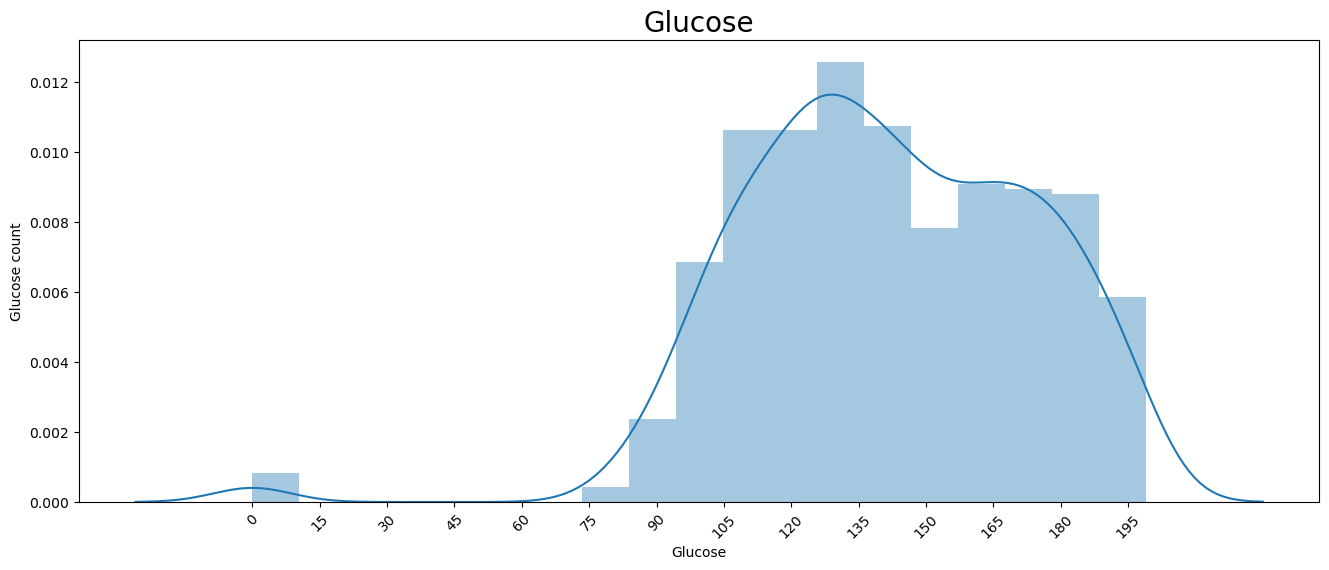

In [69]:
#glucose for diabetic
fig = plt.figure(figsize =(16,6))

sns.distplot(dataset["Glucose"][dataset["Outcome"] == 1])
plt.xticks([i for i in range(0,201,15)],rotation = 45)
plt.ylabel("Glucose count")
plt.title("Glucose",fontsize = 20)

Text(0.5, 1.0, 'Blood Pressure for Diabetic')

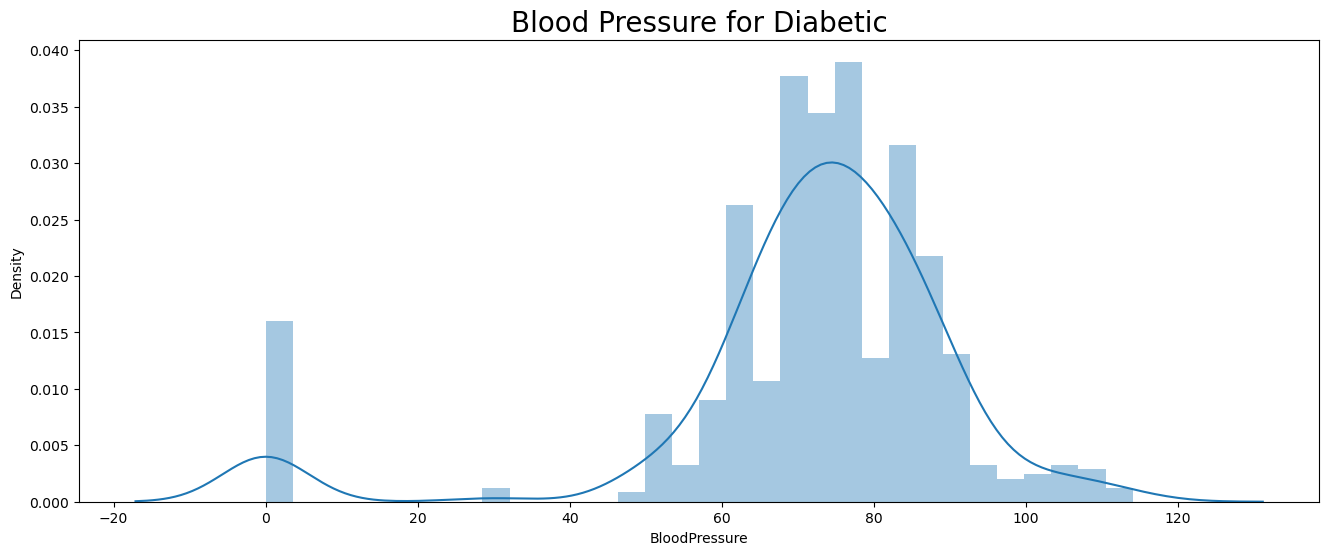

In [70]:
# BloodPressure for diabetic
fig = plt.figure(figsize=(16, 6))

sns.distplot(dataset["BloodPressure"][dataset["Outcome"] == 1])
plt.xticks()
plt.title("Blood Pressure for Diabetic", fontsize=20)

Text(0.5, 1.0, 'Skin Thickness for Diabetic')

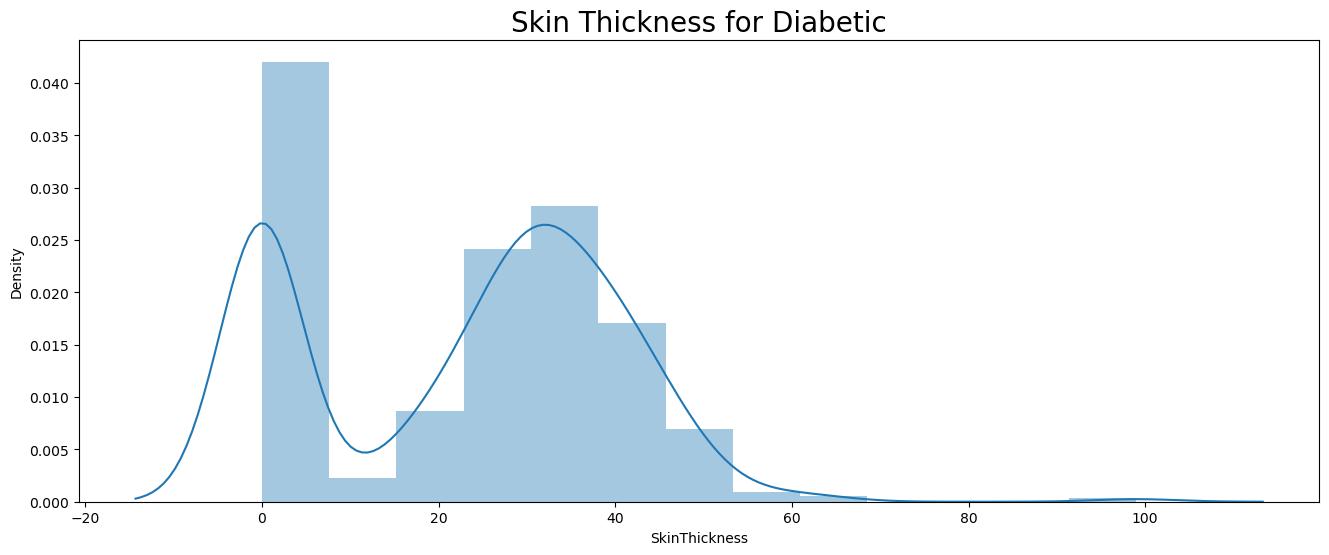

In [71]:
fig = plt.figure(figsize=(16, 6))

sns.distplot(dataset["SkinThickness"][dataset["Outcome"] == 1])
plt.xticks()
plt.title("Skin Thickness for Diabetic", fontsize=20)

Text(0.5, 1.0, 'Insulin')

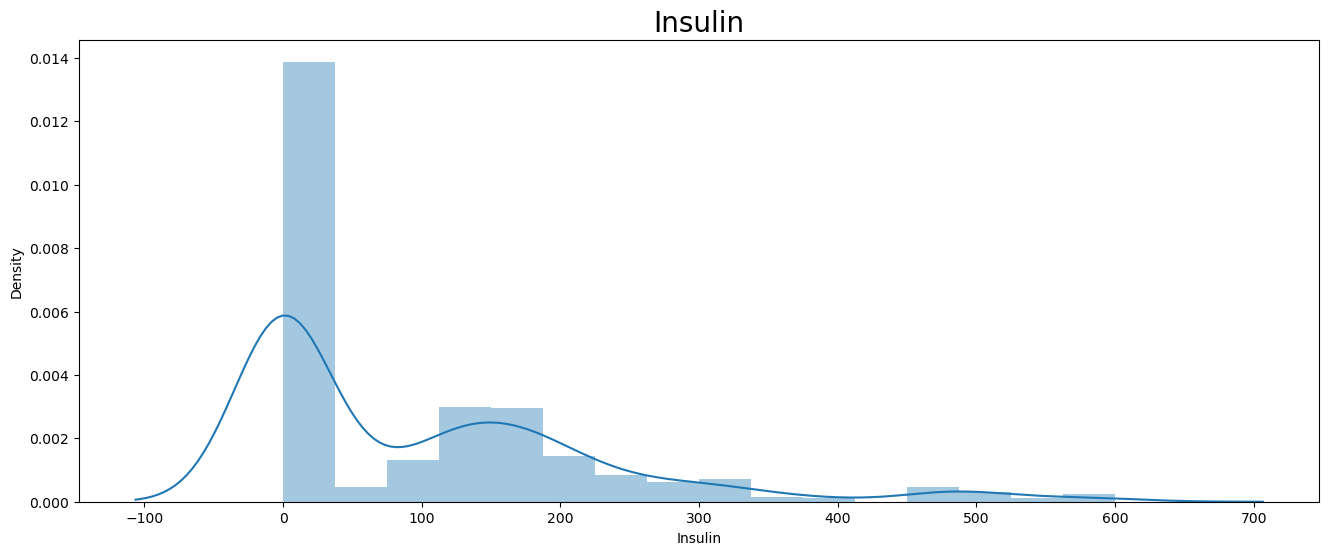

In [72]:
#insulin for diabetic 

fig = plt.figure(figsize = (16,6))

sns.distplot(dataset["Insulin"][dataset["Outcome"]==1])
plt.xticks()
plt.title("Insulin",fontsize = 20)

Text(0.5, 1.0, 'BMI')

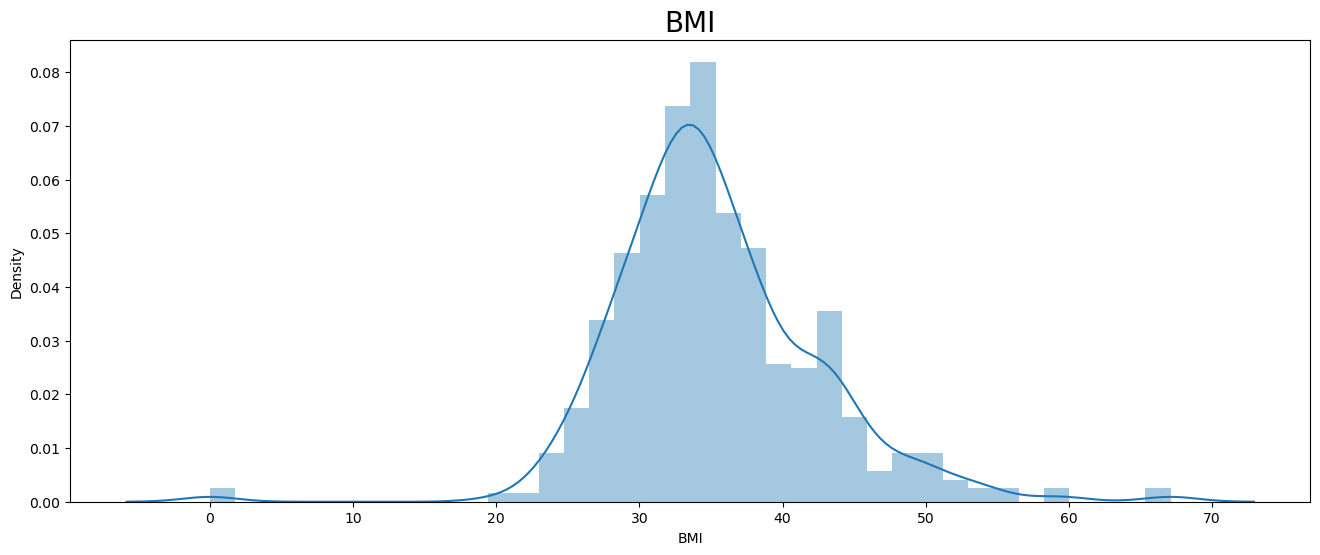

In [73]:
#BMI for diabetic
fig = plt.figure(figsize =(16,6))

sns.distplot(dataset["BMI"][dataset["Outcome"]==1])
plt.xticks()
plt.title("BMI",fontsize = 20)

Text(0.5, 1.0, 'diabetespedigreefunction')

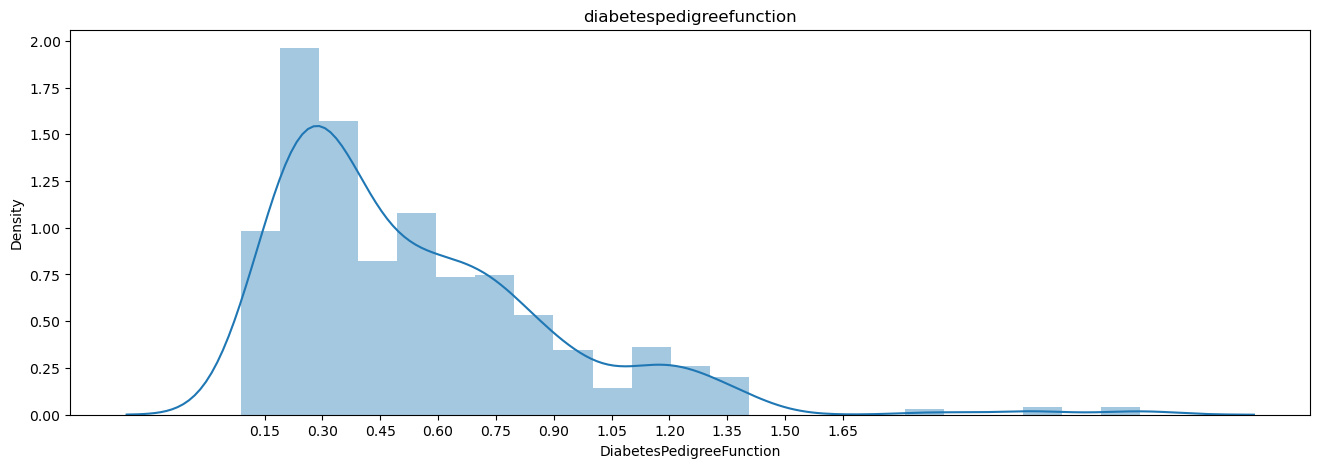

In [74]:
#diabeticpedigreefunction for diabetic
fig = plt.figure(figsize = (16,5))
sns.distplot(dataset["DiabetesPedigreeFunction"][dataset["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("diabetespedigreefunction")

Text(0.5, 1.0, 'Age')

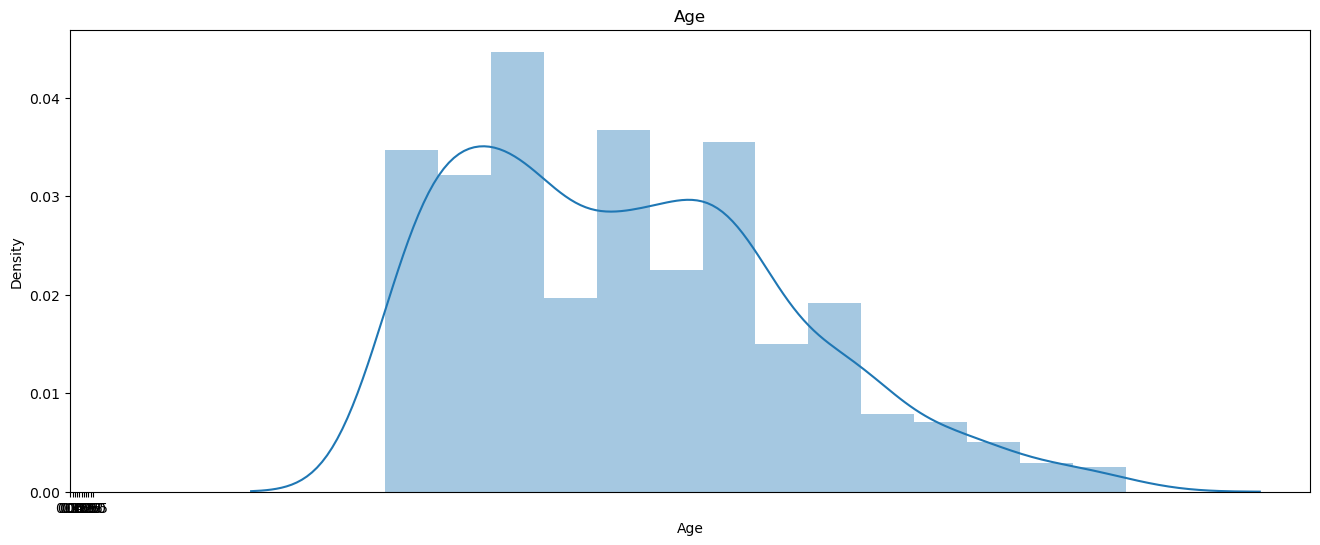

In [75]:
#Age for diabetic
fig = plt.figure(figsize = (16,6))

sns.distplot(dataset["Age"][dataset["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("Age")

In [76]:
#Removing unnessary columns
x = dataset.drop(["Outcome"],axis = 1)
y = dataset.iloc[:,-1]

In [77]:
#splitting dataset into training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#test_size 0.2 means for testing data 20% and training data 80%


In [78]:
x_train.shape #80% of original dataset (769,9) after removing unnecceasry data

(1600, 8)

In [79]:
x_test.shape #20% of original dataset (769,9) after removing unnecceasry data

(400, 8)

In [80]:
#Feature Scaling - To standardize the independent features present in the data in a fixed range.
#If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller
#values as the lower values, regardless of the unit of the values. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [81]:
x_train

array([[ 2.54014777, -0.01485297,  0.466638  , ..., -0.70153446,
        -0.65077302,  2.50732972],
       [ 4.06518958,  1.29329836,  0.16097992, ...,  1.04410009,
         1.04381097,  1.21199837],
       [-0.81494422, -0.60663571,  0.26286595, ...,  0.87438562,
        -0.5475188 ,  0.78022125],
       ...,
       [ 0.10008087, -0.82466093, -0.24656419, ..., -0.03479904,
        -0.94838813, -0.16968841],
       [ 2.23513941, -1.13612553,  0.26286595, ..., -0.26512582,
        -0.52626057,  0.17573329],
       [ 0.40508923,  0.45234393,  0.67041006, ..., -3.91398693,
         0.50628164,  3.11181769]])

### Model Building - K Nearset Neighbor

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =25, metric = 'minkowski') 
#n_neighbors is 25 bcoz for x_train we got 614 which is near to 25^2
#metric means on what factor choosing so as its KNN so our metric is minkowski i.e., distance
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [83]:
#Predicting the data
knn_y_pred = knn.predict(x_test)

In [84]:
knn_y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<Axes: >

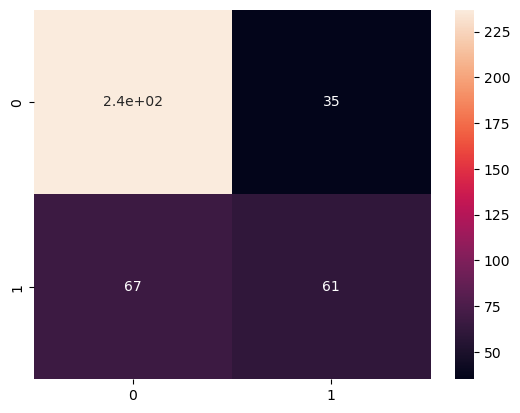

In [85]:
# Confusion matrix - To check how many are correct or wrong 
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_cm, annot=True)

In [86]:
# The above heatmap says 0,0 means true negative and 1,1 means true positive 
# and 0,1 means even person is negative but showing result positive
# and 1,0 means person is positive but shows negative so its danger so we need to accurate our model

In [87]:
print("Correct:",sum(knn_y_pred==y_test))
print("Incorrect : ",sum(knn_y_pred != y_test))
print("Accuracy:",sum(knn_y_pred ==y_test)/len(knn_y_pred))

Correct: 298
Incorrect :  102
Accuracy: 0.745


In [88]:
#Verfying accuracy using inbuilt methods
from sklearn.metrics import accuracy_score
accuracy_score(y_test,knn_y_pred)

0.745

### Simple Vector Machine

In [89]:
from sklearn.svm import SVC
svc=SVC(kernel="linear",random_state=0)
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [90]:
svc_y_pred = svc.predict(x_test)

In [91]:
svc_cm = confusion_matrix(y_test,svc_y_pred)
print(svc_cm)

[[239  33]
 [ 57  71]]


In [92]:
print("Correct:",sum(svc_y_pred == y_test))
print("Incorrect : ",sum(svc_y_pred != y_test))
print("Accuracy:",sum(svc_y_pred ==y_test)/len(knn_y_pred))

Correct: 310
Incorrect :  90
Accuracy: 0.775


### Naive Bias

In [93]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

GaussianNB()

In [94]:
nb_y_pred =nb_classifier.predict(x_test)

In [95]:
nb_cm = confusion_matrix(nb_y_pred,y_test)
print(nb_cm)

[[230  55]
 [ 42  73]]


In [96]:
print("Correct:",sum(nb_y_pred == y_test))
print("Incorrect : ",sum(nb_y_pred != y_test))
print("Accuracy:",sum(nb_y_pred ==y_test)/len(nb_y_pred))

Correct: 303
Incorrect :  97
Accuracy: 0.7575


# xgboost

In [97]:
!pip install xgboost
import xgboost as xgb
XB = xgb.XGBClassifier()

from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=0)
xgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(x_test)

In [98]:
nb_cm = confusion_matrix(y_pred,y_test)
print(nb_cm)

[[271   2]
 [  1 126]]


In [99]:
print("Correct:",sum(y_pred == y_test))
print("Incorrect : ",sum(y_pred != y_test))
print("Accuracy:",sum(y_pred ==y_test)/len(y_pred))

Correct: 397
Incorrect :  3
Accuracy: 0.9925


# RandomForestClassifier

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train, y_train)

rf_y_pred = rf_model.predict(x_test)

In [101]:
nb_cm = confusion_matrix(rf_y_pred,y_test)
print(nb_cm)

[[272   2]
 [  0 126]]


In [102]:
print("Correct:",sum(rf_y_pred == y_test))
print("Incorrect : ",sum(rf_y_pred != y_test))
print("Accuracy:",sum(rf_y_pred ==y_test)/len(rf_y_pred))

Correct: 398
Incorrect :  2
Accuracy: 0.995


### Saving the classifier

In [103]:
import pickle
pickle.dump(xgb_model, open('classifier.pkl', 'wb'))

In [104]:
pickle.dump(sc, open('sc.pkl', 'wb'))